<h1>Titanic Disaster Survival Using Logistic Regression</h1>

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

**Load the Data**

In [153]:
#load data
titanic_data = pd.read_csv('titanic_train.csv')

In [154]:
titanic_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)


**View the data using head function which returns top  rows**

In [155]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## show data info , data types and describe

In [156]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [115]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Explaining Dataset**

survival : Survival 0 = No, 1 = Yes <br>
pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex : Sex <br>
Age : Age in years <br>
sibsp : Number of siblings / spouses aboard the Titanic
<br>parch # of parents / children aboard the Titanic <br>
ticket : Ticket number fare Passenger fare cabin Cabin number <br>
embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>




<h1>Data Analysis

**Import Seaborn for visually analysing the data**

**Find out how many survived vs Died using countplot method of seaboarn**

In [ ]:
#countplot of survived vs not  survived

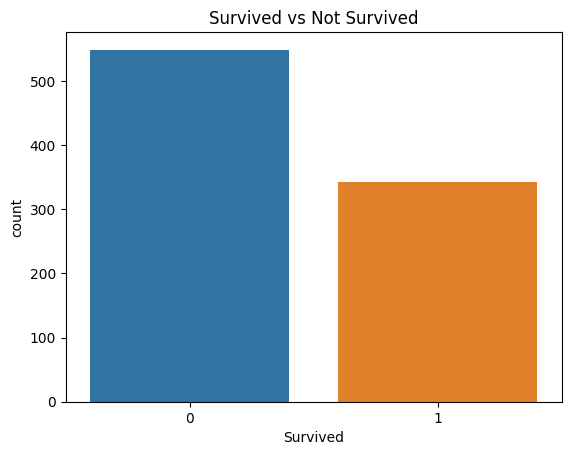

In [157]:
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survived vs Not Survived')
plt.show()

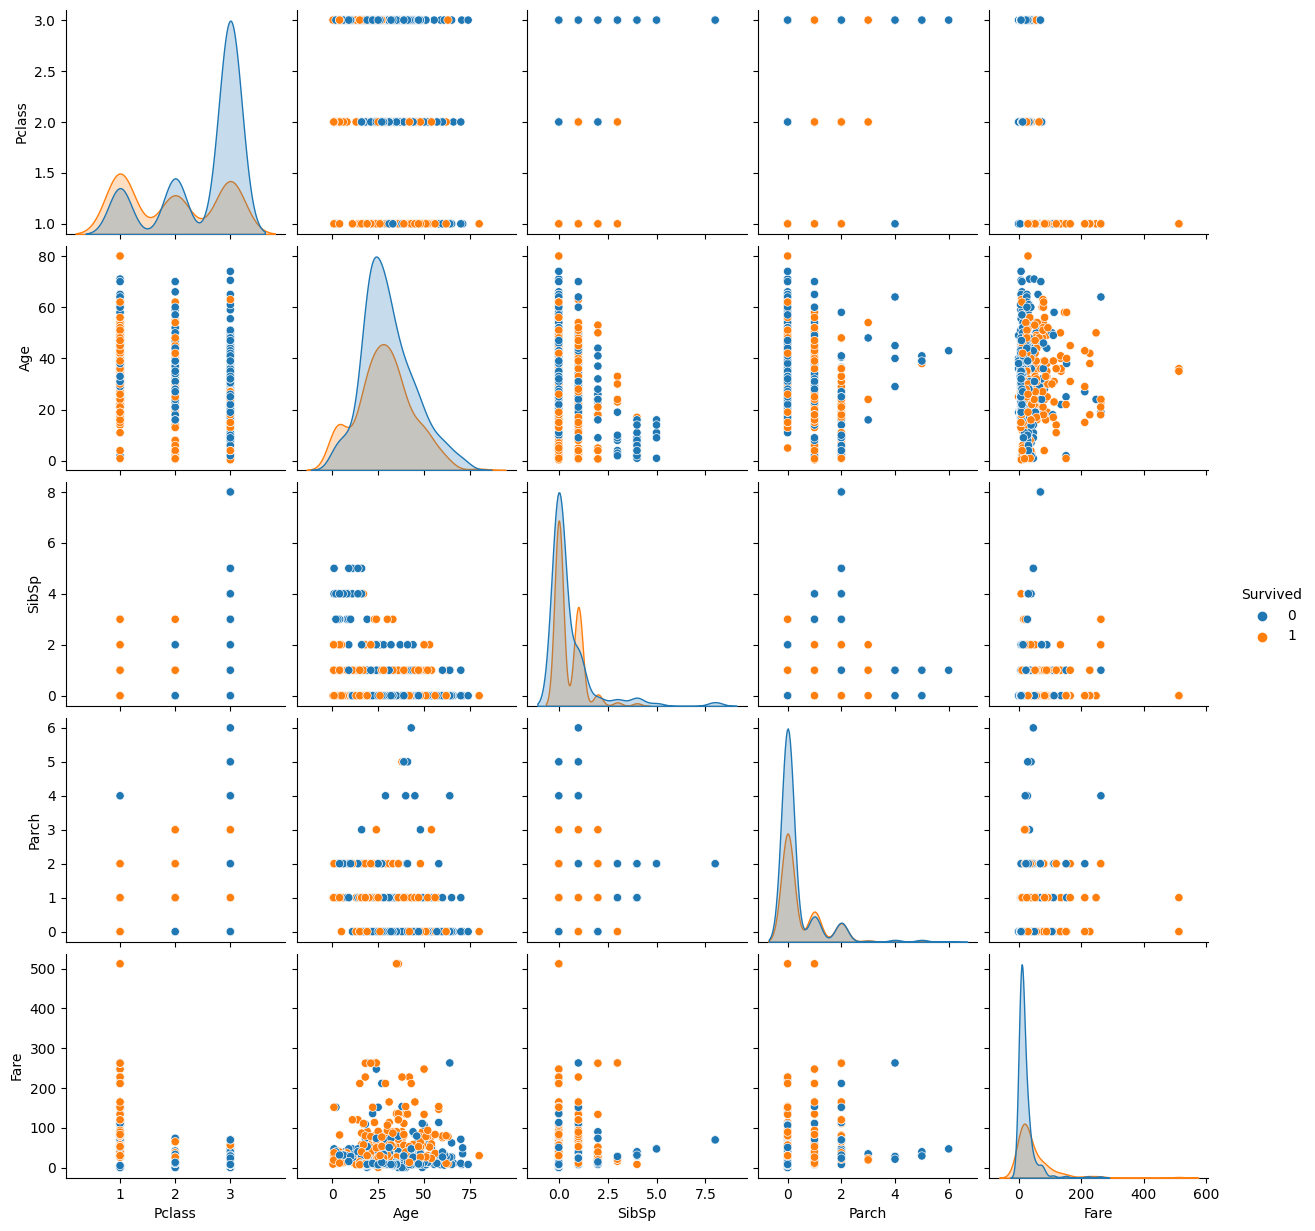

In [158]:
# Converting Survived to a string so that Seaborn treats it as a categorical variable to avoid errors with the hue parameter
# if Survived is int and the data doesn't have missing values, it should work without typecasting
titanic_data['Survived'] = titanic_data['Survived'].astype(object)
sns.pairplot(titanic_data, hue='Survived')
plt.show()

In [159]:
titanic_data['Survived'] = titanic_data['Survived'].astype('int64')
titanic_data.Survived.dtype

dtype('int64')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Survived', ylabel='Density'>

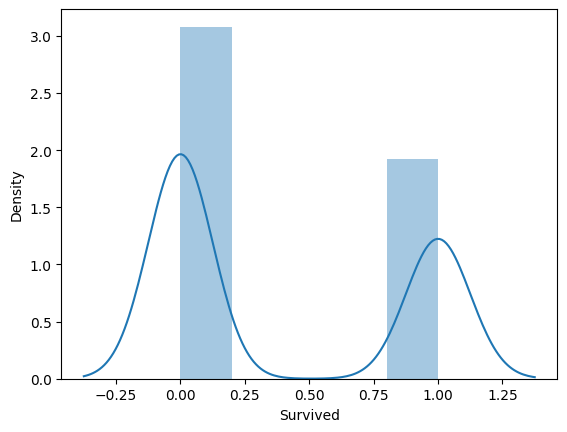

In [160]:
sns.distplot(titanic_data['Survived'])

**Male vs Female Survival**

In [ ]:
#Male vs Female Survived?

In [161]:
gender_group = titanic_data.groupby('Sex')['Survived'].mean()
print(gender_group)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


**See age group of passengeres travelled **<br>
Note: We will use displot method to see the histogram. However some records does not have age hence the method will throw an error. In order to avoid that we will use dropna method to eliminate null values from graph

In [ ]:
#Check how many values are null

In [162]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#find the % of null values in age column

In [163]:
age_nulls = titanic_data['Age'].isnull().sum()
total_values = len(titanic_data)
age_missing_percent = (age_nulls / total_values) * 100
print(f"{age_missing_percent:.3f}%")

19.865%


In [ ]:
#find the % of null values in cabin column

In [164]:
cabin_nulls = titanic_data['Cabin'].isnull().sum()
total_values = len(titanic_data)
cabin_missing_percent = (cabin_nulls / total_values) * 100
print(f"{cabin_missing_percent:.3f}%")

77.104%


In [ ]:
#find the distribution for the age column

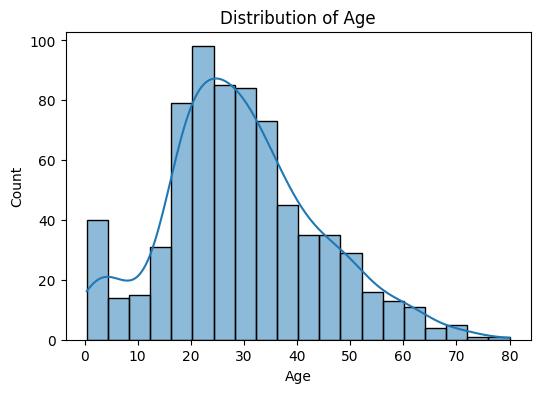

In [165]:
plt.figure(figsize=(6, 4))
sns.histplot(titanic_data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

<h1>Data Modelling

**Building Model using Logestic Regression**

**Build the model**

In [ ]:
#import train test split method

In [166]:
#Seperate Dependent and Independent variables (features and label)
X = titanic_data[['Pclass','Age','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
y= titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.6, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

# 60% : 20% : 20%

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 400
Validation set size: 134
Test set size: 179


<h1>Data Cleaning

**Fill the missing values**<br> we will fill the missing values for age. In order to fill missing values we use fillna method.<br> For now we will fill the missing age by taking average of all age

In [ ]:
#fill age column

In [167]:
# filling missing values with median because the age distribution is right skewed
median_age = X_train['Age'].median()

X_train['Age'].fillna(median_age, inplace=True)
X_val['Age'].fillna(median_age, inplace=True)
X_test['Age'].fillna(median_age, inplace=True)

**We can verify that no more null data exist** <br> we will examine data by isnull mehtod which will return nothing

In [ ]:
#verify null value

In [168]:
X_train['Age'].isnull().sum()

0

In [149]:
X_val['Age'].isnull().sum()

0

In [91]:
X_test['Age'].isnull().sum()

0

**We can see cabin column has a number of null values, as such we can not use it for prediction. Hence we will drop it**

In [ ]:
#handle cabin column missing values


In [169]:
X_train['hasCabin'] = X_train['Cabin'].notna().astype(int)
X_val['hasCabin'] = X_val['Cabin'].notna().astype(int)
X_test['hasCabin'] = X_test['Cabin'].notna().astype(int)

In [170]:
# Drop the 'Cabin' column
X_train.drop(['Cabin'], axis=1, inplace=True)
X_val.drop(['Cabin'], axis=1, inplace=True)
X_test.drop(['Cabin'], axis=1, inplace=True)

X_train.head()

,Pclass,Age,Sex,SibSp,Parch,Ticket,Fare,Embarked,hasCabin
537,1,30.0,female,0,0,PC 17761,106.425,C,0
94,3,59.0,male,0,0,364500,7.250,S,0
806,1,39.0,male,0,0,112050,0.000,S,1
781,1,17.0,female,1,0,17474,57.000,S,1
322,2,30.0,female,0,0,234818,12.350,Q,0


In [171]:
# handling 'Embarked' missing values (only exists in 'X_train')
X_train['Embarked'].mode()
X_train['Embarked'].fillna('S', inplace = True)

In [172]:
X_train.isnull().sum()

Pclass      0
Age         0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
hasCabin    0
dtype: int64

**Preaparing Data for Model**<br>
No we will require to convert all non-numerical columns to numeric. Please note this is required for feeding data into model. Lets see which columns are non numeric info describe method

In [ ]:
#Check for the non-numeric column

In [173]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 537 to 131
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    400 non-null    int64  
 1   Age       400 non-null    float64
 2   Sex       400 non-null    object 
 3   SibSp     400 non-null    int64  
 4   Parch     400 non-null    int64  
 5   Ticket    400 non-null    object 
 6   Fare      400 non-null    float64
 7   Embarked  400 non-null    object 
 8   hasCabin  400 non-null    int32  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 29.7+ KB


**We can see, Name, Sex, Ticket and Embarked are non-numerical.It seems Name,Embarked and Ticket number are not useful for Machine Learning Prediction hence we will eventually drop it. For Now we would convert Sex Column to dummies numerical values******

In [ ]:
#convert sex column to numerical values one hot

In [174]:
X_train = pd.get_dummies(X_train, columns=['Sex'])

X_val = pd.get_dummies(X_val, columns=['Sex'])

X_test = pd.get_dummies(X_test, columns=['Sex'])

In [175]:
print(X_train.head())
print(X_val.head())
print(X_test.head())

     Pclass   Age  SibSp  Parch    Ticket     Fare Embarked  hasCabin  \
537       1  30.0      0      0  PC 17761  106.425        C         0   
94        3  59.0      0      0    364500    7.250        S         0   
806       1  39.0      0      0    112050    0.000        S         1   
781       1  17.0      1      0     17474   57.000        S         1   
322       2  30.0      0      0    234818   12.350        Q         0   

     Sex_female  Sex_male  
537           1         0  
94            0         1  
806           0         1  
781           1         0  
322           1         0  
     Pclass   Age  SibSp  Parch      Ticket     Fare Embarked  hasCabin  \
411       3  27.0      0      0      394140   6.8583        Q         0   
185       1  27.0      0      0      113767  50.0000        S         1   
436       3  21.0      2      2  W./C. 6608  34.3750        S         0   
743       3  24.0      1      0      376566  16.1000        S         0   
821       3  27.0 

In [179]:
#drop the columns which are not required
X_train.drop(['Ticket','Embarked'],axis=1, inplace=True)
X_val.drop(['Ticket','Embarked'],axis=1 ,inplace=True)
X_test.drop(['Ticket','Embarked'],axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 537 to 131
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      400 non-null    int64  
 1   Age         400 non-null    float64
 2   SibSp       400 non-null    int64  
 3   Parch       400 non-null    int64  
 4   Fare        400 non-null    float64
 5   hasCabin    400 non-null    int32  
 6   Sex_female  400 non-null    uint8  
 7   Sex_male    400 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(2)
memory usage: 21.1 KB


In [176]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 400 entries, 537 to 131
Series name: Survived
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB


In [177]:
from sklearn.preprocessing import StandardScaler

In [180]:
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#import Logistic  Regression

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()


In [ ]:
#Fit  Logistic Regression

In [183]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
#predict

In [184]:
# Predict validation data
y_val_pred = log_reg.predict(X_val_scaled)

# Predict test data
y_test_pred = log_reg.predict(X_test_scaled)

<h1>Testing

**See how our model is performing**

In [ ]:
#print confusion matrix

In [185]:
from sklearn.metrics import confusion_matrix

In [187]:
pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,90,15
Actual Yes,17,57


In [190]:
pd.DataFrame(confusion_matrix(y_val,y_val_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,71,17
Actual Yes,10,36


In [ ]:
#import classification report

In [188]:
from sklearn.metrics import classification_report

In [189]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [191]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        88
           1       0.68      0.78      0.73        46

    accuracy                           0.80       134
   macro avg       0.78      0.79      0.78       134
weighted avg       0.81      0.80      0.80       134



**Precision is fine considering Model Selected and Available Data. Accuracy can be increased by further using more features (which we dropped earlier) and/or  by using other model**

Note: <br>
Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations <br>
Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class
F1 score - F1 Score is the weighted average of Precision and Recall.

